# AMP Salvage Network

To construct a model of the AMP Salvage Network, first we import  __masspy__ . 

In [1]:
import matplotlib.pyplot as plt

from mass import (
    io, MassMetabolite, MassReaction, MassModel, Simulation, plot_simulation, qcqa_model)

## Model Construction 

The first step of creating a model of the AMP Salvage Network is to define the MassModel object. 

In [2]:
ampsn = MassModel("AMP-Salvage-Network")

### Metabolites

The next step is to define all of the metabolites in AMP Salvave Network using identifiers and the names found in the BiGG Database (http://bigg.ucsd.edu/). In order to ensure our model is physiologically accurate, it is important to provide the __formula__ keyword with a string representing the chemical formula for each metabolite, and the  __charge__ keyword with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). To indicate that the cytosol is the cellular compartment in which the AMP Salvage Network occurs, the string "c" is provided to the __compartment__ keyword. 

In this model of the AMP Salvage Network, there are 15 metabolites inside the cytosol compartment. 

In [3]:
# AMP Salvage Network Intermediates
adn_c = MassMetabolite(
    "adn_c",
    name="Adenosine",
    formula="C10H13N5O4",
    charge=0,
    compartment="c")

ade_c = MassMetabolite(
    "ade_c",
    name="Adenine",
    formula="C5H5N5",
    charge=0,
    compartment="c")

imp_c = MassMetabolite(
    "imp_c",
    name="Inosine monophosphate",
    formula="C10H11N4O8P",
    charge=-2,
    compartment="c")

ins_c = MassMetabolite(
    "ins_c",
    name="Inosine",
    formula="C10H12N4O5",
    charge=0,
    compartment="c")

hxan_c = MassMetabolite(
    "hxan_c",
    name="Hypoxanthine",
    formula="C5H4N4O",
    charge=0,
    compartment="c")

r1p_c = MassMetabolite(
    "r1p_c",
    name="Alpha-D-Ribose 1-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c")

r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c")

prpp_c = MassMetabolite(
    "prpp_c",
    name="5-Phospho-alpha-D-ribose 1-diphosphate",
    formula="C5H8O14P3",
    charge=-5,
    compartment="c")

atp_c = MassMetabolite(
    "atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c")

adp_c = MassMetabolite(
    "adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c")

amp_c = MassMetabolite(
    "amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c")
# Cofactors
h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c")
h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c")
pi_c = MassMetabolite(
    "pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c")
nh3_c = MassMetabolite(
    "nh3_c",
    name="Ammonia",
    formula="H3N",
    charge=0,
    compartment="c")

metabolite_list = [adn_c, ade_c, imp_c, ins_c, hxan_c,
                   r1p_c, r5p_c, prpp_c, atp_c, adp_c, 
                   amp_c, pi_c, nh3_c, h_c, h2o_c]

After generating the metabolites, all metabolites are added to the model.

In [4]:
ampsn.add_metabolites(metabolite_list)

### Reactions

Once all of the MassMetabolite objects have been created for each metabolite in AMP Salvage Network, the next step is to define all of the reactions that occur inside the cytosol compartment using BiGG idenfifiers and reaction names. To make this model useful for integration with other models, it is important to provide the string "AMP Salvage Network" to the __subsystem__ keyword. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger model. 

Note that after the creation of each MassReaction object, the metabolites are added to the reaction using a dictionary where keys are the metabolites and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

In this model of the AMP Salvage Network, there are 10 reactions occuring inside the cytosol.

In [5]:
ADNK1 = MassReaction(
    "ADNK1",
    name="Adenosine kinase",
    subsystem="AMP Salvage Network", 
    reversible=False)
ADNK1.add_metabolites({
    adn_c: -1,
    atp_c: -1,
    adp_c: 1,
    amp_c: 1,
    h_c: 1})

NTD7 = MassReaction(
    "NTD7",
    name="5'-nucleotidase (AMP)",
    subsystem="AMP Salvage Network", 
    reversible=False)
NTD7.add_metabolites({
    amp_c: -1,
    h2o_c: -1,
    adn_c: 1,
    pi_c: 1})

AMPDA = MassReaction(
    "AMPDA",
    name="Adenosine monophosphate deaminase",
    subsystem="AMP Salvage Network", 
    reversible=False)
AMPDA.add_metabolites({
    amp_c: -1,
    h2o_c: -1,
    imp_c: 1,
    nh3_c: 1})

NTD11 = MassReaction(
    "NTD11",
    name="5'-nucleotidase (IMP)",
    subsystem="AMP Salvage Network", 
    reversible=False)
NTD11.add_metabolites({
    imp_c: -1,
    h2o_c: -1,
    ins_c: 1,
    pi_c: 1})

ADA = MassReaction(
    "ADA",
    name="Adenosine deaminase",
    subsystem="AMP Salvage Network", 
    reversible=False)
ADA.add_metabolites({
    adn_c: -1,
    h2o_c: -1,
    ins_c: 1,
    nh3_c: 1})

PUNP5 = MassReaction(
    "PUNP5",
    name="Purine-nucleoside phosphorylase (Inosine)",
    subsystem="AMP Salvage Network")
PUNP5.add_metabolites({
    ins_c: -1,
    pi_c: -1,
    hxan_c: 1,
    r1p_c: 1})

PPM = MassReaction(
    "PPM",
    name="Phosphopentomutase",
    subsystem="AMP Salvage Network")
PPM.add_metabolites({
    r1p_c: -1,
    r5p_c: 1})
# Must account for lack of ADK1 reaction in this model. 
# Therefore, coefficients of atp_c and adp_c are -2 and 2
PRPPS = MassReaction(
    "PRPPS",
    name="Phosphoribosylpyrophosphate synthetase",
    subsystem="AMP Salvage Network", 
    reversible=False)
PRPPS.add_metabolites({
    atp_c: -2,
    r5p_c: -1,
    adp_c: 2,
    h_c: 1,
    prpp_c: 1})

ADPT = MassReaction(
    "ADPT",
    subsystem="AMP Salvage Network", 
    reversible=False)
ADPT.add_metabolites({
    ade_c: -1,
    h2o_c: -1,
    prpp_c: -1,
    amp_c: 1,
    h_c: 1,
    pi_c: 2
})

ATPM = MassReaction(
    "ATPM",
    name="ATP maintenance requirement",
    subsystem="Misc.", 
    reversible=False)
ATPM.add_metabolites({
    adp_c: -1,
    h_c: -1,
    pi_c: -1, 
    atp_c: 1,
    h2o_c: 1})

reaction_list = [ADNK1, NTD7, AMPDA, NTD11, ADA,
                 PUNP5, PPM, PRPPS, ADPT, ATPM]

After generating the reactions, all reactions are added to the glycolysis model. Adding the MassReaction objects will also add their associated MassMetabolite objects if they have not already been added to the model. 

In [6]:
ampsn.add_reactions(reaction_list)

### Exchange reactions

After generating the reactions, the next step is to add the exchange reactions and fix the concentrations of the external metabolites of the system. This can easily be done using the __MassModel.add_exchange__ method. With the generation of the exchange reactions, the character "e" is used to defined the "Extracellular" compartment. Therefore, it is recommended to add the definition to the __MassModel.compartment__ attribute. 

In this model of the AMP Salvage Network, there are 9 exchange reactions.

In [7]:
EX_adn_e = ampsn.add_exchange(adn_c, exchange_type="exchange", 
                                    external_concentration=1.2e-3)
EX_ade_e = ampsn.add_exchange(ade_c, exchange_type="exchange", 
                                external_concentration=1.0e-3)
EX_ins_e = ampsn.add_exchange(ins_c, exchange_type="exchange", 
                                external_concentration=1.0e-3)
EX_hxan_e = ampsn.add_exchange(hxan_c, exchange_type="exchange", 
                                external_concentration=2.0e-3)
EX_amp_e = ampsn.add_exchange(amp_c, exchange_type="exchange", 
                                external_concentration=8.67281e-2)
EX_h_e = ampsn.add_exchange(h_c, exchange_type="exchange", 
                                external_concentration=6.30957e-5)
EX_h2o_e = ampsn.add_exchange(h2o_c, exchange_type="exchange", 
                                external_concentration=1)
EX_pi_e = ampsn.add_exchange(pi_c, exchange_type="exchange", 
                                 external_concentration=2.5)
EX_nh3_e = ampsn.add_exchange(nh3_c, exchange_type="exchange", 
                                 external_concentration=9.1002e-2)
ampsn

Name,AMP-Salvage-Network
Memory address,0x011db5fc88
Stoichiometric Matrix,15x19
Matrix Rank,14
Matrix Type,"dense, float64"
Number of Metabolites,15
Number of Reactions,19
Number of Initial Conditions,0
Number of Forward Rate Constants,0
Number of Equilibrium Constants,8
Number of Irreversible Reactions,8


### Optional: Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the model to follow the physiology. To reorder the internal species, one can use the method __cobra.DictList.get_by_any__ method with the list of metabolite identifiers in the desirable order. To ensure all metabolites are still present and not forgotten in the model, a QC/QA check is also performed. 

In [8]:
from cobra import DictList

In [9]:
new_metabolite_order = ["adn_c", "ade_c", "imp_c", "ins_c", "hxan_c", 
                        "r1p_c", "r5p_c", "prpp_c", "atp_c", "adp_c", 
                        "amp_c", "pi_c", "nh3_c", "h_c", "h2o_c"]

if len(ampsn.metabolites) == len(new_metabolite_order):
    ampsn.metabolites = DictList(ampsn.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = ["ADNK1", "NTD7", "AMPDA", "NTD11", "ADA", 
                      "PUNP5", "PPM", "PRPPS", "ADPT", "ATPM",
                      "EX_adn_e", "EX_ade_e", "EX_ins_e", 
                      "EX_hxan_e", "EX_nh3_e", "EX_pi_e",
                      "EX_amp_e", "EX_h_e", "EX_h2o_e"]

if len(ampsn.reactions) == len(new_reaction_order):
    ampsn.reactions = DictList(ampsn.reactions.get_by_any(new_reaction_order))
    
ampsn.update_S(matrix_type="DataFrame")

,ADNK1,NTD7,AMPDA,NTD11,ADA,PUNP5,PPM,PRPPS,ADPT,ATPM,EX_adn_e,EX_ade_e,EX_ins_e,EX_hxan_e,EX_nh3_e,EX_pi_e,EX_amp_e,EX_h_e,EX_h2o_e
adn_c,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ade_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
imp_c,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ins_c,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
hxan_c,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
r1p_c,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r5p_c,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
prpp_c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
atp_c,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adp_c,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Parameterization
### Steady State fluxes
Steady state fluxes can be computed as a summation of the MinSpan pathway vectors. 

Pathways are obtained using the minspan package (https://github.com/SBRG/minspan). 

Using these pathways and literature sources, independent fluxes can be defined in order to calculate the steady state flux vector. Because we have five pathways, we have to specify five fluxes to set the steady state. 

1. In a steady state, the synthesis of AMP is balanced by degradation, that is $v_{EX_{amp}}=0$. Thus, the sum of the flux through the first three pathways must be balanced by the fourth to make the AMP exchange rate zero. Note that the fifth pathway has no net AMP exchange rate. 

2. The fifth pathway is uniquely defined by either the exchange rate of hypoxanthine or adenine. These two exchange rates are not independent. The uptake rate of adenine is approximately 0.014 mM/hr (Joshi, 1990). 

3. The exchange rate of adenosine would specify the relative rate of pathways one and four. The rate of $v_{ADNK1}$ is set to 0.12 mM/hr, specifying the flux through $\textbf{p}_{4}$. The net uptake rate of adenosine is set at 0.01 mM/hr, specifying the flux of $\textbf{p}_{1}$ to be 0.11 mM/hr.

4. Since $\textbf{p}_{1}$ and $\textbf{p}_{4}$ differ by 0.01 mM/hr in favor of AMP synthesis, it means that the sum of $\textbf{p}_{2}$ and $\textbf{p}_{3}$ has to be 0.01 mM/hr. To specify the contributions to that sum of the two pathways, we would have to know one of the internal rates, such as the deaminases or the phosphorylases. We set the flux of adenosine deaminase to 0.01 mM/hr as it a very low flux enzyme based on an earlier model (Joshi, 1990).

5. This assignment sets the flux of $\textbf{p}_{2}$ to zero and $\textbf{p}_{3}$ to 0.01 mM/hr. We pick the flux through $\textbf{p}_{2}$ to be zero since it overlaps with  $\textbf{p}_{5}$ and gives flux values to all the reactions in the pathways. 

With these pathays and numerical values, the steady state flux vector can be computed as the weighted sum of the corresponding basis vectors. The steady state flux vector is computed as an inner product:

In [10]:
minspan_paths = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,-1, 1,-1],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,-1, 1,-2],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,-1, 1,-2],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1,-1, 0, 0, 0, 0,-1, 1,-1, 1],
    [0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,-1, 0, 1, 1, 0, 0, 0,-1]]

ampsn_ss_fluxes = ampsn.compute_steady_state_fluxes(
                    minspan_paths, 
                    {EX_amp_e: 0.0, EX_ade_e: -0.014, ADNK1: 0.12,
                     EX_adn_e: -0.01, AMPDA: 0.014},
                    update_reactions=True);
for rxn in ampsn.reactions:
    print("%s: %s" % (rxn.id, rxn.ssflux))

ADNK1: 0.12
NTD7: 0.12
AMPDA: 0.014
NTD11: 0.014
ADA: 0.01
PUNP5: 0.014
PPM: 0.014
PRPPS: 0.014
ADPT: 0.014
ATPM: 0.148
EX_adn_e: -0.009999999999999995
EX_ade_e: -0.014
EX_ins_e: 0.01
EX_hxan_e: 0.014
EX_nh3_e: 0.024
EX_pi_e: 0.0
EX_amp_e: 0.0
EX_h_e: 0.0
EX_h2o_e: -0.024000000000000007


### Initial Conditions

Once the network has been built, the concentrations can be added to the metabolites. The cytosolic metabolite concentrations are added to each individual metabolite using the __MassMetabolite.initial_condition__ or __MassMetabolite.ic__  setter methods. Once added, the __MassModel.set_initial_conditions__ method is used to add the initial conditions into the MassModel object itself. 


In [11]:
adn_c.ic = 1.2e-3
ade_c.ic = 1.0e-3
imp_c.ic = 1.0e-2
ins_c.ic = 1.0e-3
hxan_c.ic = 2.0e-3
r1p_c.ic = 6.0e-2
r5p_c.ic = 4.94e-3
prpp_c.ic = 5.0e-3
atp_c.ic = 1.6
adp_c.ic = 0.29
amp_c.ic = 8.67281e-2
pi_c.ic = 2.5
nh3_c.ic = 9.1002e-2
h_c.ic = 6.30957e-5
h2o_c.ic = 1

ampsn.set_initial_conditions()

### Equilibirum Constants

After adding initial conditions and steady state fluxes, the equilibrium constants  are defined using the __MassReaction.equilibrium_constant__ or __MassReaction.Keq__ setter methods. 

In [12]:
# Cytosolic reactions
PUNP5.Keq = 0.09
PPM.Keq = 13.3
# Exchanges
EX_adn_e.Keq = 1
EX_ade_e.Keq = 1
EX_ins_e.Keq = 1
EX_hxan_e.Keq = 1 
EX_amp_e.Keq = 1
EX_h_e.Keq = 1
EX_h2o_e.Keq = 1
EX_pi_e.Keq = 1
EX_nh3_e.Keq = 1

### Calculation of PERCs
By defining the equilibrium constant and steady state parameters, the values of the pseudo rate constants (PERCs) can be calculated and added to the model using the __MassModel.calc_PERCS__ method.

In [13]:
percs = ampsn.calculate_PERCs(update_reactions=True);
for rxn_kf, perc in percs.items():
    print("%s: %.3f" % (rxn_kf, perc))

kf_ADNK1: 62.500
kf_NTD7: 1.384
kf_AMPDA: 0.161
kf_NTD11: 1.400
kf_ADA: 8.333
kf_PUNP5: 12.000
kf_PPM: 0.235
kf_PRPPS: 1.107
kf_ADPT: 2800.000
kf_ATPM: 0.204
kf_EX_adn_e: 100000.000
kf_EX_ade_e: 100000.000
kf_EX_ins_e: 100000.000
kf_EX_hxan_e: 100000.000
kf_EX_nh3_e: 100000.000
kf_EX_pi_e: 100000.000
kf_EX_amp_e: 100000.000
kf_EX_h_e: 100000.000
kf_EX_h2o_e: 100000.000


## QC/QA Model

Before we simulate the model, it is important to ensure that the model is elementally balanced, and that the model can simulate. Therefore, the __qcqa_model__ method is used to provide a report on the model quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

__Note:__ Typically exchange and demand reactions are necessarily elementally balanced and therefore should not generally be a cause for concern. Because the NADH reaction generates electrons for processes that use redox potential, it is expected to not be balanced.

In [14]:
qcqa_model(ampsn, parameters=True, concentrations=True, 
           fluxes=True, superfluous=True, elemental=True)

╒═════════════════════════════════╕
│ MODEL ID: AMP-Salvage-Network   │
│ SIMULATABLE: True;              │
│ NUMERICAL CONSISTENCY: True     │
╞═════════════════════════════════╡
╘═════════════════════════════════╛


From the results of the QC/QA test, it can be seen that the model can be simulated and is numerically consistent.

## Steady State and and Model Validation

To find the steady state of the model, the __Simulation.find_steady_state_model__ method can used, and the 
__Simulation.update_values__ will update the values in the Simulation object with the steady state values. 
To validate the steady state of the model, concentration and flux solutions can be plotted using the __plot_simulation__ function.

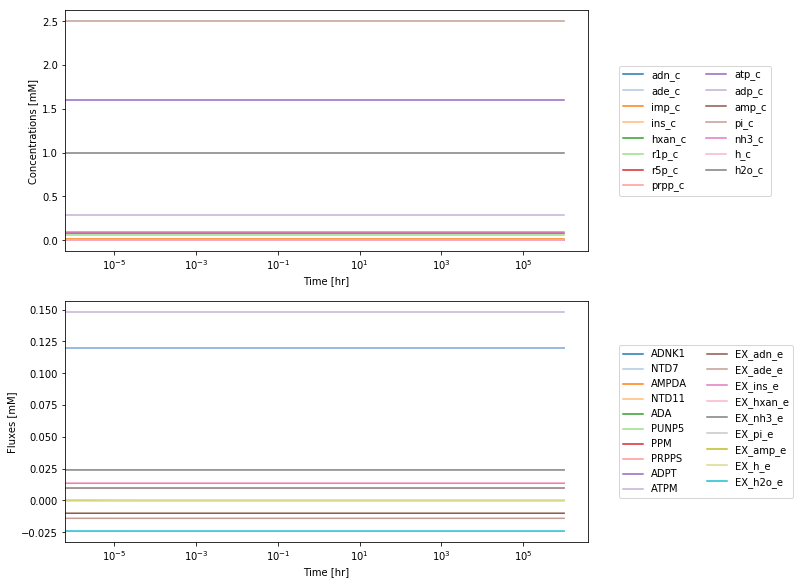

In [15]:
sim = Simulation(ampsn)
sim.find_steady_state_model(ampsn, update_initial_conditions=True,
                            update_reactions=True);
sim.update_values(ampsn);
t0, tf = (0, 1e6)
conc_sol, flux_sol = sim.simulate_model(ampsn, time=(t0, tf))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 8), constrained_layout=True);

plot_simulation(conc_sol, ax=ax1, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Concentrations [mM]");

plot_simulation(flux_sol, ax=ax2, legend="right outside",
                plot_function="semilogx", xlabel="Time [hr]",
                ylabel="Fluxes [mM]");

### Optional Information: Storing references
#### Compartment
Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the __MassModel.compartments__ attribute.

In [16]:
ampsn.compartments = {"c": "Cytosol"}
print(ampsn.compartments)

{'c': 'Cytosol'}


#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount, "Liters" for volume, and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the __MassModel.units__ attribute. Like the __compartment__ attribute, the __units__ attribute is a dictionary and can easily be updated using the same methods.

Note that this attribute will NOT track units, but instead acts as a reference for the user and others so that they can perform necessary unit conversions.

In [17]:
ampsn.units = {'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}
ampsn.units

{'N': 'Millimoles', 'Vol': 'Liters', 'Time': 'Hours'}

#### Literature

Because specific sources of literature were used in the building of this model, it is important for others who wish to use this model to be able to access those same literature sources. In general, to preserve information for users, either the __notes__ attribute or the __annotation__ attribute can be used. In this case, the literature source is placed in __notes__. 

In [18]:
ampsn.notes.update({"Literature": 
    ["A. Joshi and B.O. Palsson. Metabolic dynamics in the human red cell. Part IV–data prediction and some model computations. J. theor. Biol., 142:69–85, 1990."]})
ampsn.notes

{'Literature': ['A. Joshi and B.O. Palsson. Metabolic dynamics in the human red cell. Part IV–data prediction and some model computations. J. theor. Biol., 142:69–85, 1990.']}

## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or if the model conforms to SBML standards, as a ".xml" file using the classes in __mass.io__. To export the model, only the path to the directory and the name of the model need to be specified. Both are shown. 

In [19]:
from mass.io import json#, sbml

### Export using JSON

In [20]:
io.json.save_json_model(ampsn, "../../models/json-models/amp_salvage_network.json")

### Export using SBML

In [21]:
# sbml.write_sbml_model(ampsn, "../../models/sbml-models/amp_salvage_network.xml")